In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\asus\Downloads\Mobile Price Prediction.csv")

In [3]:
data

,Screen Size (inches),RAM (GB),Storage (GB),Battery Capacity (mAh),Camera Quality (MP),Price ($)
0,6.2,4,64,4000,48,500
1,6.1,3,128,3110,12,800
2,6.5,6,256,4500,64,600
3,6.7,8,128,4300,48,700
4,6.4,6,128,4200,40,550
...,...,...,...,...,...,...
287,6.0,6,64,3700,12,750
288,6.3,4,128,4025,32,450
289,6.6,8,256,5000,48,700
290,6.5,6,128,4500,64,550


In [4]:
data.columns=['ScreenSize','RAM','Storage','Batterycapacity',
              'cameraquality','Price']

In [5]:
data

,ScreenSize,RAM,Storage,Batterycapacity,cameraquality,Price
0,6.2,4,64,4000,48,500
1,6.1,3,128,3110,12,800
2,6.5,6,256,4500,64,600
3,6.7,8,128,4300,48,700
4,6.4,6,128,4200,40,550
...,...,...,...,...,...,...
287,6.0,6,64,3700,12,750
288,6.3,4,128,4025,32,450
289,6.6,8,256,5000,48,700
290,6.5,6,128,4500,64,550


In [6]:
data.isnull().sum()

ScreenSize         0
RAM                0
Storage            0
Batterycapacity    0
cameraquality      0
Price              0
dtype: int64

In [7]:
for i in data.columns:
    print(i,':','\n',data[i].unique())

ScreenSize : 
 [6.2 6.1 6.5 6.7 6.4 6.  6.3 6.6 5.8 5.7 5.9 6.8 6.9]
RAM : 
 [4 3 6 8]
Storage : 
 [ 64 128 256  32]
Batterycapacity : 
 [4000 3110 4500 4300 4200 3700 4025 5000 3000 3500 3800 4100 4400 3100
 4600 4700]
cameraquality : 
 [48 12 64 40 32 16 24 20]
Price : 
 [500 800 600 700 550 750 450 400 650 900]


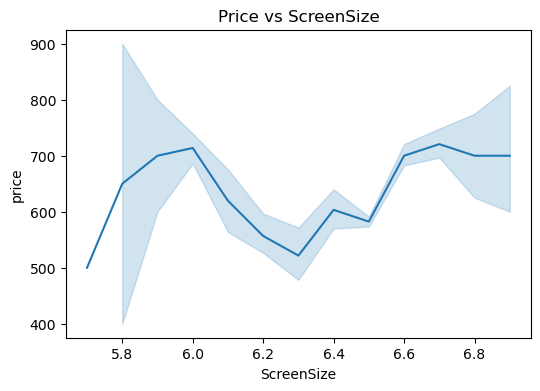

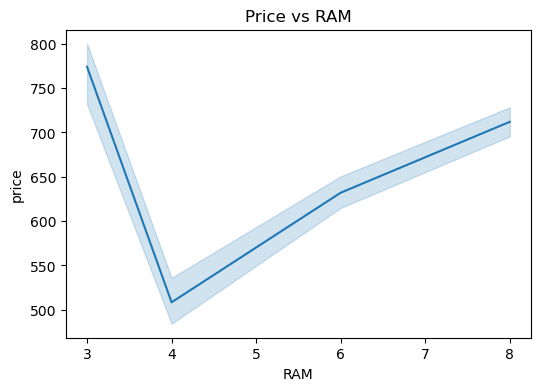

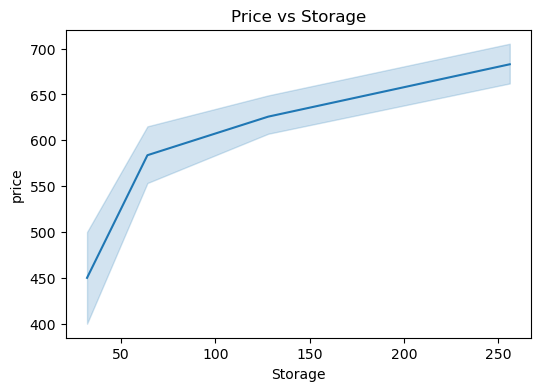

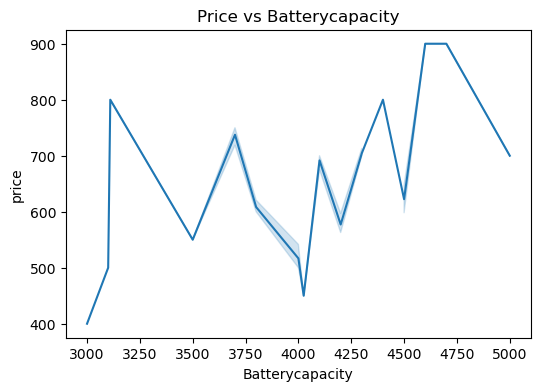

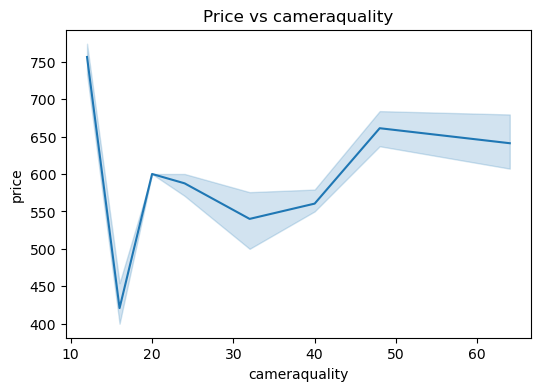

In [8]:
cols = ['ScreenSize', 'RAM', 'Storage', 'Batterycapacity','cameraquality']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.lineplot(x=col, y='Price', data=data)
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show() 

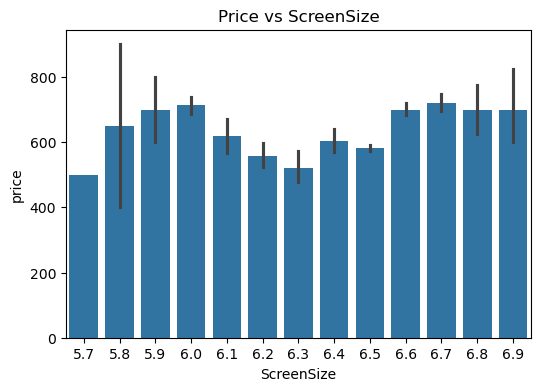

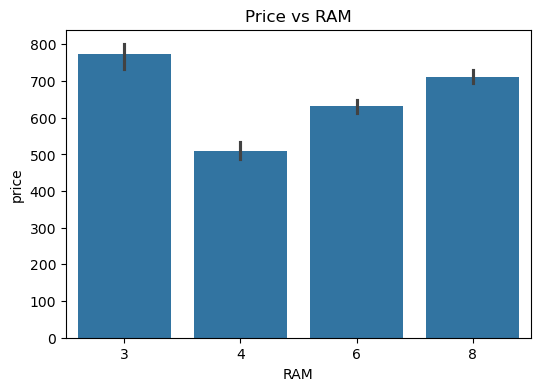

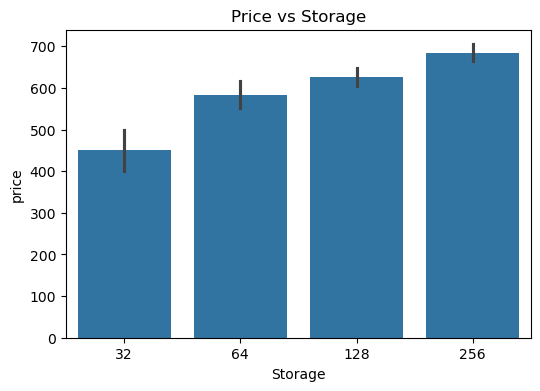

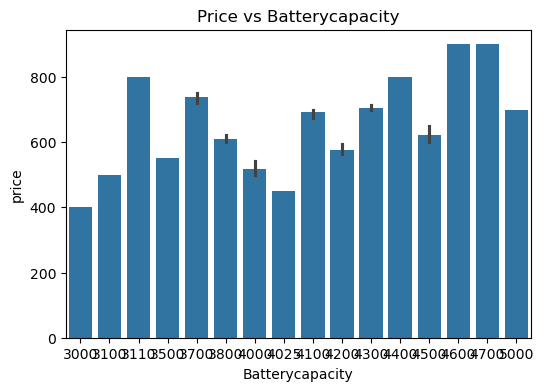

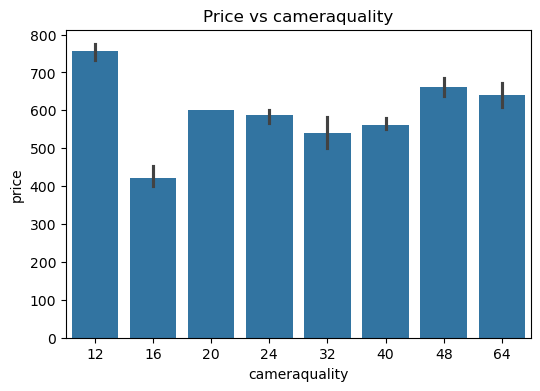

In [9]:
cols = ['ScreenSize', 'RAM', 'Storage', 'Batterycapacity','cameraquality']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Price', data=data)
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

<Axes: xlabel='ScreenSize', ylabel='Price'>

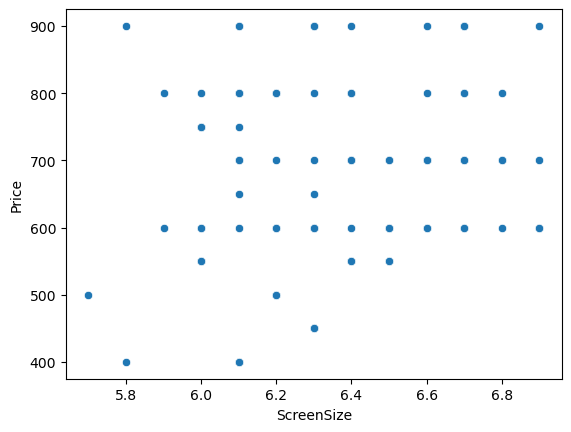

In [10]:
sns.scatterplot(x=data.ScreenSize,y=data.Price)

<Axes: xlabel='ScreenSize', ylabel='Price'>

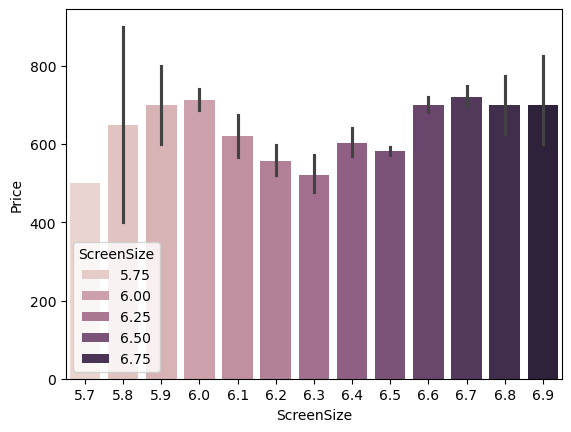

In [11]:
sns.barplot(x=data.ScreenSize,y=data.Price,hue=data.ScreenSize)

<Axes: xlabel='RAM', ylabel='Price'>

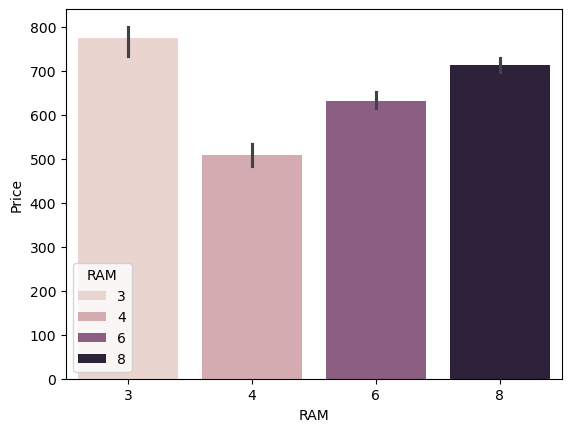

In [12]:
sns.barplot(x=data.RAM,y=data.Price,hue=data.RAM)

<Axes: xlabel='Storage', ylabel='Price'>

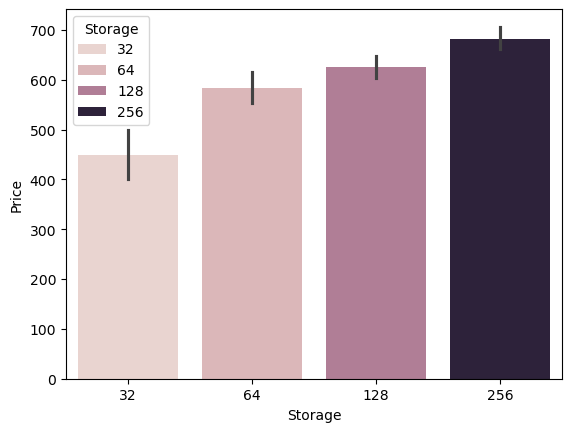

In [13]:
sns.barplot(x=data.Storage,y=data.Price,hue=data.Storage)

<Axes: xlabel='Storage', ylabel='Price'>

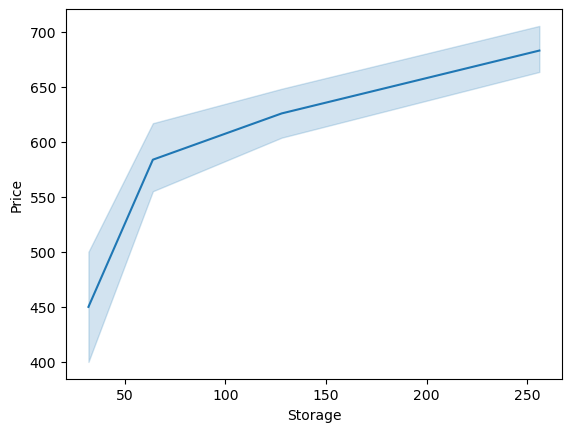

In [14]:
sns.lineplot(x=data.Storage,y=data.Price)

<Axes: xlabel='Batterycapacity', ylabel='Price'>

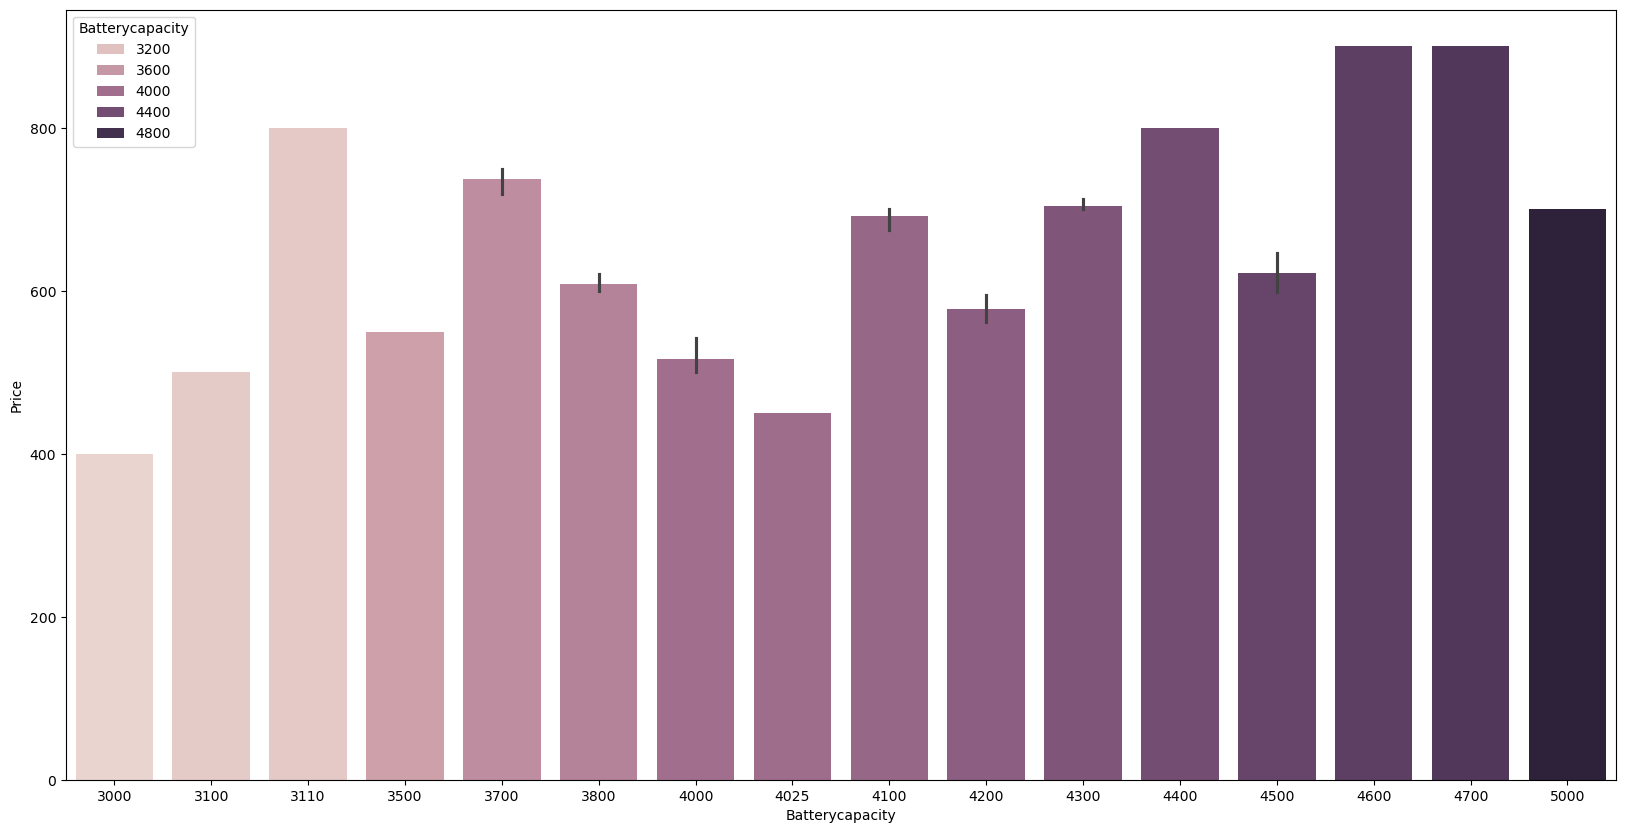

In [15]:
plt.figure(figsize=(20,10))
sns.barplot(x=data.Batterycapacity,y=data.Price,hue=data.Batterycapacity)

In [16]:
d=data.corr()

<Axes: >

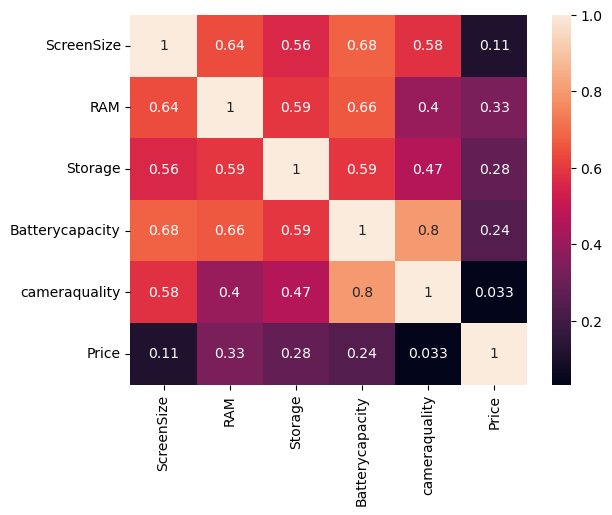

In [17]:
sns.heatmap(d,annot=True)

In [18]:
ip=data.drop(['Price'],axis=1)

In [19]:
op=data['Price']

In [20]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.1)

In [21]:
#standard scalar transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [22]:
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg.fit(x_train,y_train)

LinearRegression()

In [23]:
yp=alg.predict(x_test)

In [24]:
#accuracy
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,yp)
r2=r2_score(y_test,yp)

In [25]:
print(mse,r2)

13208.416572358714 0.2617559437899182


In [26]:
#polynomial
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(x_train)
pol_reg=LinearRegression()

pol_reg.fit(X_poly,y_train)
x1=poly.fit_transform(x_test)
yp2=pol_reg.predict(x1)


In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
b2=mean_squared_error(y_test,yp2)
c2=r2_score(y_test,yp2)
print(b2,c2)



6870.325464936447 0.6160041659094673


In [32]:
# Lasso Regrassion
from sklearn.linear_model import Lasso
L=Lasso(alpha=0.5)
L.fit(x_train,y_train)
yp2=L.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
b2=mean_squared_error(y_test,yp2)
c2=r2_score(y_test,yp2)
print(b2,c2)

13221.723330899793 0.2610122032100721


In [33]:
# Ridge Regrassion
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.9)
R.fit(x_train,y_train)
yp1=R.predict(x_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
b1=mean_squared_error(y_test,yp1)
c1=r2_score(y_test,yp1)
print(b1,c1)

13210.048202518134 0.26166474881128277
